In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Se miran las clases del dataset

In [3]:
irisi = pd.DataFrame(iris.data, columns=iris.feature_names)
print(irisi.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
irisi["target"] = iris.target
print(irisi)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [5]:
irisi.columns = ["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "objetivo"]


In [6]:
irisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   largo_sepalo  150 non-null    float64
 1   ancho_sepalo  150 non-null    float64
 2   largo_petalo  150 non-null    float64
 3   ancho_petalo  150 non-null    float64
 4   objetivo      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
irisi.describe()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,objetivo
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Se puede concluir los siguiente: El conjunto de datos tiene 150 observaciones y muestra una clara variabilidad en las dimensiones de sépalos y pétalos. En promedio, los sépalos miden unos 5.84 cm de largo y 3.06 cm de ancho, con una dispersión moderada, mientras que los pétalos son más variables, con una longitud media de 3.76 cm y un ancho de 1.20 cm. Los valores mínimos y máximos reflejan especies de flores con diferencias morfológicas marcadas: los sépalos van de 4.3 cm a 7.9 cm, y los pétalos de 1.0 cm a 6.9 cm de largo. El atributo “objetivo” toma tres valores discretos (0, 1, 2), correspondientes a las tres especies de Iris, distribuidas equitativamente. En conjunto, las estadísticas sugieren una buena separación entre clases basada en las medidas de los pétalos, que presentan mayor rango y desviación estándar.

A continuación se saca información básica del dataset usando gráficas, basándome en las más usuales.

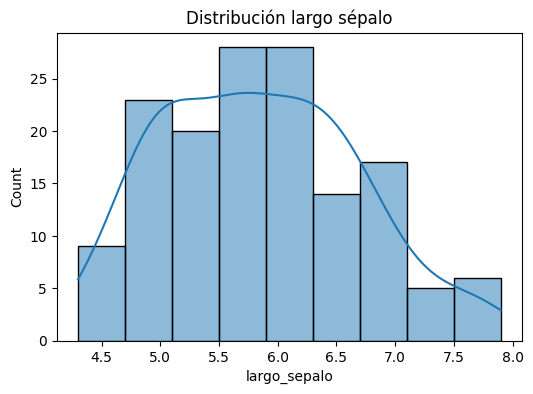

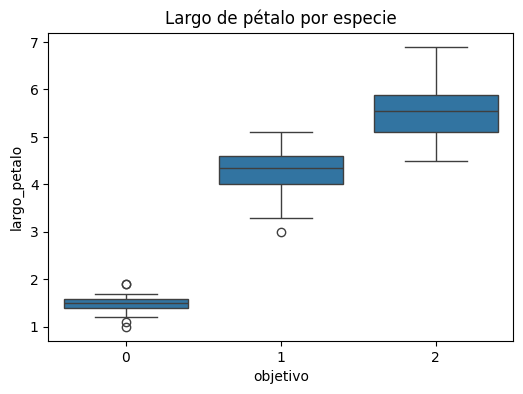

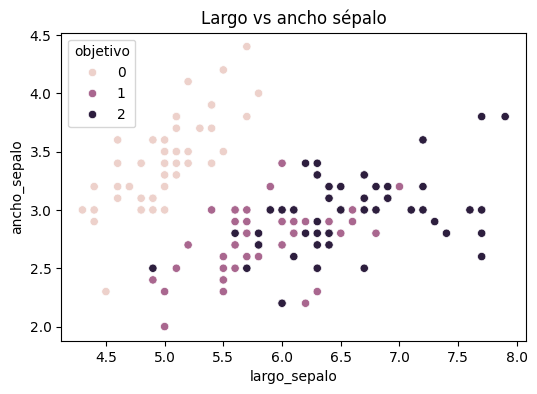

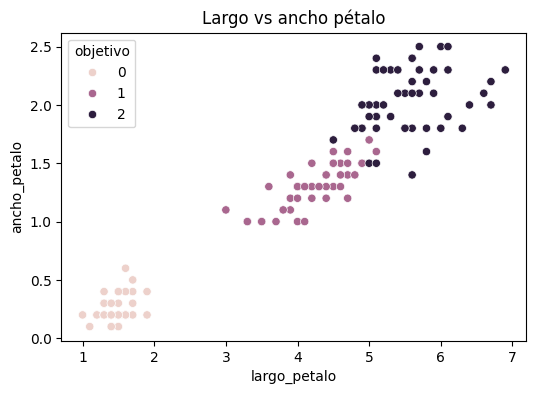

<Figure size 600x400 with 0 Axes>

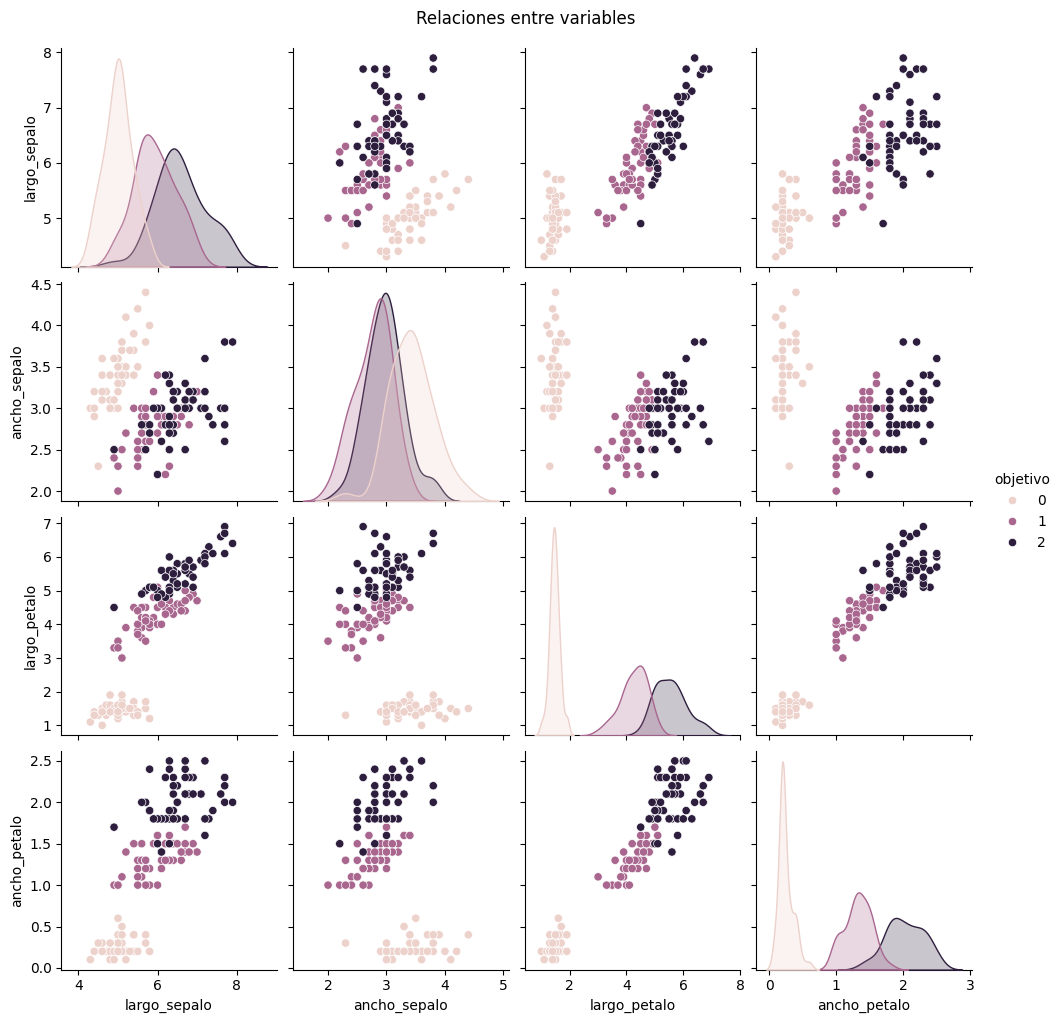

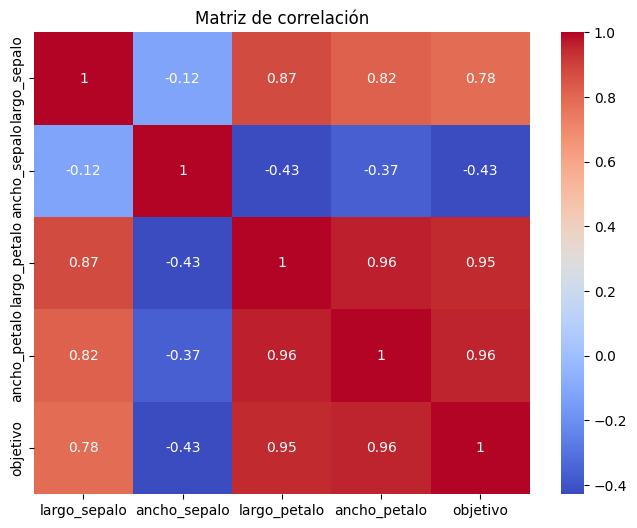

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
irisi = pd.DataFrame(iris.data, columns=iris.feature_names)
irisi["objetivo"] = iris.target
irisi.columns = ["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "objetivo"]

plt.figure(figsize=(6,4))
sns.histplot(irisi["largo_sepalo"], kde=True)
plt.title("Distribución largo sépalo")

plt.figure(figsize=(6,4))
sns.boxplot(x="objetivo", y="largo_petalo", data=irisi)
plt.title("Largo de pétalo por especie")

plt.figure(figsize=(6,4))
sns.scatterplot(x="largo_sepalo", y="ancho_sepalo", hue="objetivo", data=irisi)
plt.title("Largo vs ancho sépalo")

plt.figure(figsize=(6,4))
sns.scatterplot(x="largo_petalo", y="ancho_petalo", hue="objetivo", data=irisi)
plt.title("Largo vs ancho pétalo")

plt.figure(figsize=(6,4))
sns.pairplot(irisi, hue="objetivo", diag_kind="kde")
plt.suptitle("Relaciones entre variables", y=1.02)

plt.figure(figsize=(8,6))
corr = irisi.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")

plt.show()


Comentarios sobre  las gráficas:

Distribución del largo del sépalo: muestra que los valores se concentran alrededor de 5.5–6 cm, lo que indica una distribución relativamente normal, aunque con ligera variación entre especies.

Largo del pétalo por especie: el boxplot evidencia que el largo del pétalo es una de las variables más discriminantes: setosa tiene pétalos mucho más cortos, versicolor intermedios y virginica los más largos.

Largo vs ancho del sépalo: muestra cierta relación positiva, pero con bastante dispersión; no separa bien las especies.

Largo vs ancho del pétalo: aquí se ve una clara separación entre las tres especies, con correlación positiva fuerte.

Pairplot: confirma que las combinaciones de medidas del pétalo son las más útiles para distinguir especies, mientras que las del sépalo se solapan más.

Matriz de correlación: indica correlaciones altas entre largo y ancho del pétalo aprox (0.96), y más débiles entre las medidas del sépalo aprox (0.75), lo que sugiere que las características del pétalo son más relevantes para la clasificación

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(irisi, irisi["objetivo"]):
    datos_entrenamiento = irisi.loc[train_index]
    datos_prueba = irisi.loc[test_index]

print("Tamaño entrenamiento:", len(datos_entrenamiento))
print("Tamaño prueba:", len(datos_prueba))

print("\nProporción de clases en entrenamiento:")
print(datos_entrenamiento["objetivo"].value_counts(normalize=True))

print("\nProporción de clases en prueba:")
print(datos_prueba["objetivo"].value_counts(normalize=True))


Tamaño entrenamiento: 120
Tamaño prueba: 30

Proporción de clases en entrenamiento:
objetivo
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

Proporción de clases en prueba:
objetivo
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


El código utiliza StratifiedShuffleSplit para dividir el conjunto de datos del dataset nombrado irisi en dos subconjuntos: uno de entrenamiento (80 %) y otro de prueba (20 %), asegurando que la proporción de cada clase en la columna objetivo se mantenga igual en ambos conjuntos. Esto evita sesgos en la distribución de las especies al entrenar y evaluar el modelo. Luego se imprimen el tamaño de cada subconjunto y las proporciones de clases para confirmar que la estratificación se realizó correctamente.

A continuación se desarrolla la frontera de clasificación basado en la teoría vista en clase. Aquí se trabaja con un código que entrena un modelo de regresión logística, para clasificar si una flor del conjunto Iris pertenece o no a la especie setosa, usando solo la longitud del sépalo como característica. Primero estandariza los datos para mejorar la estabilidad numérica, luego ajusta el modelo con estos valores y calcula las probabilidades de pertenecer o no a la clase setosa para un rango continuo de longitudes del sépalo. A partir de estas probabilidades, identifica la frontera de decisión, es decir, el punto donde la probabilidad de ambas clases es igual (≈ 0.5). Por último grafica las curvas de probabilidad, la frontera y los puntos de datos reales, mostrando visualmente cómo el modelo separa las dos clases, y reporta la precisión de la clasificación.

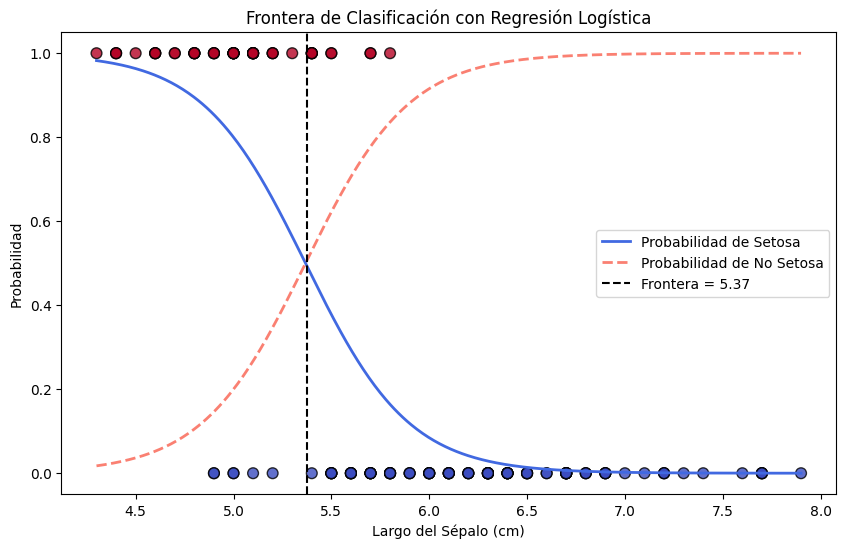

Precisión del modelo: 89.33%
Valor de la frontera de decisión: 5.37 cm


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["objetivo"] = (iris.target == 0).astype(int)

x = data[["sepal length (cm)"]].values
y = data["objetivo"].values

escala = StandardScaler()
x_esc = escala.fit_transform(x)

modelo = LogisticRegression()
modelo.fit(x_esc, y)

x_nuevo = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
x_nuevo_esc = escala.transform(x_nuevo)
prob = modelo.predict_proba(x_nuevo_esc)

frontera = x_nuevo[prob[:, 0] >= 0.5][0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_nuevo, prob[:, 1], color="royalblue", linewidth=2, label="Probabilidad de Setosa")
ax.plot(x_nuevo, prob[:, 0], color="salmon", linestyle="--", linewidth=2, label="Probabilidad de No Setosa")
ax.axvline(frontera, color="k", linestyle="--", label=f"Frontera = {frontera[0]:.2f}")

ax.scatter(x, y, c=y, cmap="coolwarm", s=60, edgecolor="k", alpha=0.8)
ax.set_xlabel("Largo del Sépalo (cm)")
ax.set_ylabel("Probabilidad")
ax.set_title("Frontera de Clasificación con Regresión Logística")
ax.legend()
plt.show()

pred = modelo.predict(x_esc)
acierto = np.mean(pred == y)
print(f"Precisión del modelo: {acierto*100:.2f}%")
print(f"Valor de la frontera de decisión: {frontera[0]:.2f} cm")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Clases únicas: [0 1 2]
Coeficientes:
 [[-1.10648299  1.01829237 -1.78502328 -1.67559927]
 [ 0.5456412  -0.35894883 -0.21560047 -0.81278855]
 [ 0.56084179 -0.65934353  2.00062375  2.48838782]]
Intercepciones:
 [-0.2640872   1.91410163 -1.65001443]
Predicciones:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0]
Probabilidades (primeros 5):
 [[9.79304330e-01 2.06953208e-02 3.49199646e-07]
 [3.80805375e-03 3.69358095e-01 6.26833851e-01]
 [1.48155903e-01 8.43111598e-01 8.73249835e-03]
 [9.38835051e-02 8.96151747e-01 9.96474784e-03]
 [9.88914754e-01 1.10850834e-02 1.62883753e-07]]


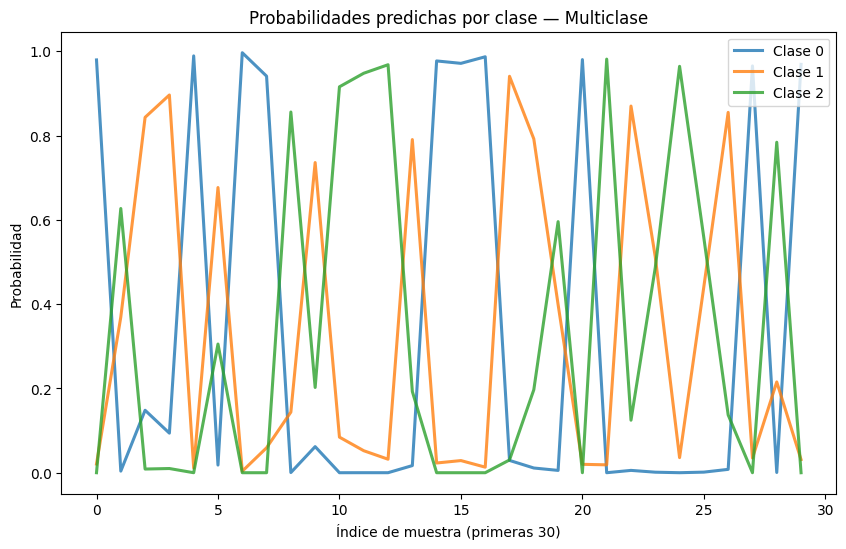

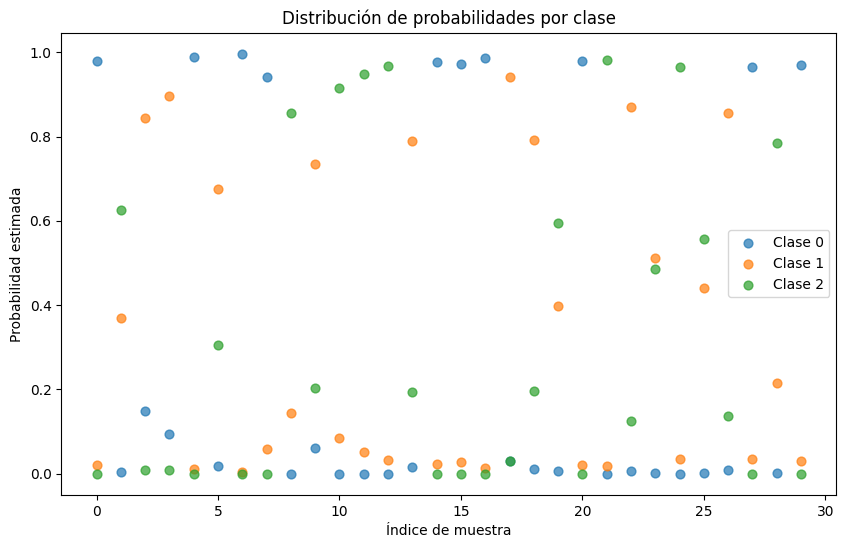

    Verdadero  Predicho  P_clase0  P_clase1      P_clase2
0           0         0  0.979304  0.020695  3.491996e-07
1           2         2  0.003808  0.369358  6.268339e-01
2           1         1  0.148156  0.843112  8.732498e-03
3           1         1  0.093884  0.896152  9.964748e-03
4           0         0  0.988915  0.011085  1.628838e-07
5           1         1  0.018150  0.676581  3.052681e-01
6           0         0  0.996411  0.003589  2.750579e-08
7           0         0  0.940833  0.059165  1.276337e-06
8           2         2  0.000406  0.143843  8.557511e-01
9           1         1  0.061880  0.735855  2.022642e-01
10          2         2  0.000016  0.084425  9.155584e-01
11          2         2  0.000071  0.052193  9.477367e-01
12          2         2  0.000042  0.032041  9.679167e-01
13          1         1  0.016927  0.790369  1.927047e-01
14          0         0  0.976923  0.023077  3.841194e-07


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo"]
df["objetivo"] = iris.target

X = df[["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo"]].values
y = df["objetivo"].values

esc = StandardScaler()
X_esc = esc.fit_transform(X)

X_ent, X_pru, y_ent, y_pru = train_test_split(X_esc, y, test_size=0.2, random_state=42, stratify=y)

multi = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
multi.fit(X_ent, y_ent)

pred = multi.predict(X_pru)
prob = multi.predict_proba(X_pru)

print("Clases únicas:", multi.classes_)
print("Coeficientes:\n", multi.coef_)
print("Intercepciones:\n", multi.intercept_)
print("Predicciones:\n", pred[:15])
print("Probabilidades (primeros 5):\n", prob[:5])

plt.figure(figsize=(10, 6))
for i, clase in enumerate(multi.classes_):
    plt.plot(prob[:30, i], label=f"Clase {clase}", lw=2.2, alpha=0.8)
plt.title("Probabilidades predichas por clase — Multiclase")
plt.xlabel("Índice de muestra (primeras 30)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, clase in enumerate(multi.classes_):
    plt.scatter(np.arange(len(y_pru)), prob[:, i], alpha=0.7, s=40, label=f"Clase {clase}")
plt.title("Distribución de probabilidades por clase")
plt.xlabel("Índice de muestra")
plt.ylabel("Probabilidad estimada")
plt.legend()
plt.show()

res = pd.DataFrame({
    "Verdadero": y_pru,
    "Predicho": pred,
    "P_clase0": prob[:, 0],
    "P_clase1": prob[:, 1],
    "P_clase2": prob[:, 2]
})
print(res.head(15))


comentarios sobre el anterior código:
Aquí se construye y analiza un modelo de regresión logística multiclase aplicado al conjunto de datos de Iris. Primero, carga el dataset, organiza las variables en un DataFrame con nombres en español y separa las características x del objetivo y. Luego, estandariza los datos con StandardScaler para que todas las variables tengan la misma escala.

Después divide los datos en conjuntos de entrenamiento y prueba (80%-20%), y entrena un modelo de regresión logística configurado con el método multinomial y el solucionador lbfgs, adecuado para clasificar más de dos clases.
Después de entrenar, el modelo predice las clases y calcula las probabilidades asociadas a cada clase para las muestras del conjunto de prueba.
Finalmente, muestra los coeficientes, interceptos y predicciones, y genera dos gráficas:
una que ilustra las probabilidades predichas por clase para las primeras muestras, y otra que muestra la distribución de probabilidades para todas las muestras de prueba.
El código concluye mostrando un resumen tabular con los valores verdaderos, los predichos y las probabilidades asignadas a cada clase, permitiendo evaluar visual y numéricamente el desempeño del clasificador multiclase.

Ahora veamos como le hacemos a esto: ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Evaluación de flor hipotética:
Características: [4.9 5.  1.8 0.3]
Probabilidades por clase:
  Setosa      : 0.99982
  Versicolor  : 0.00018
  Virginica   : 0.00000
Predicción más probable: setosa


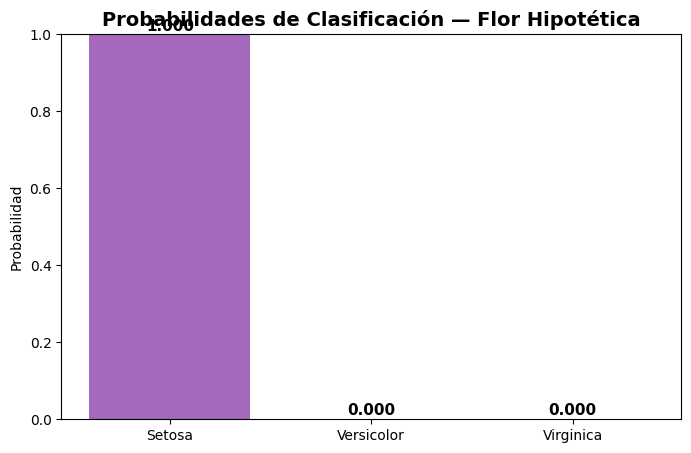

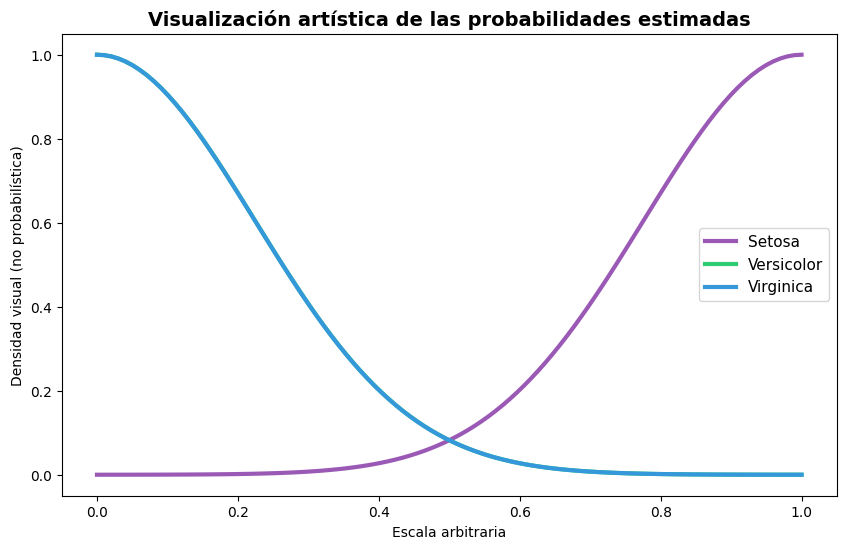


Resumen de probabilidades:

        Clase  Probabilidad  Probabilidad (%)  Más probable
0      Setosa  9.998212e-01             99.98          True
1  Versicolor  1.787833e-04              0.02         False
2   Virginica  2.713911e-10              0.00         False

La flor con características [4.9, 5.0, 1.8, 0.3] 
tiene una probabilidad de pertenecer a la clase:
- Setosa: 0.9998
- Versicolor: 0.0002
- Virginica: 0.0000

Según el modelo, la flor más probable es: Setosa.



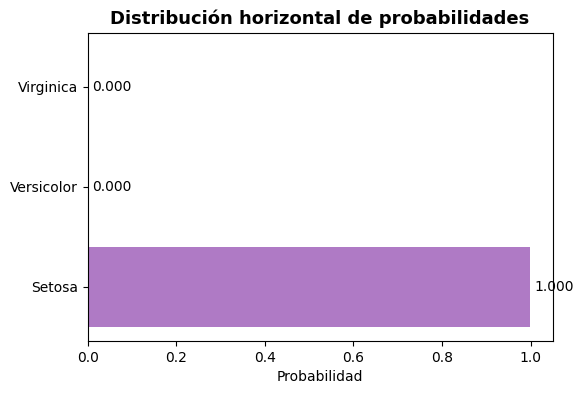

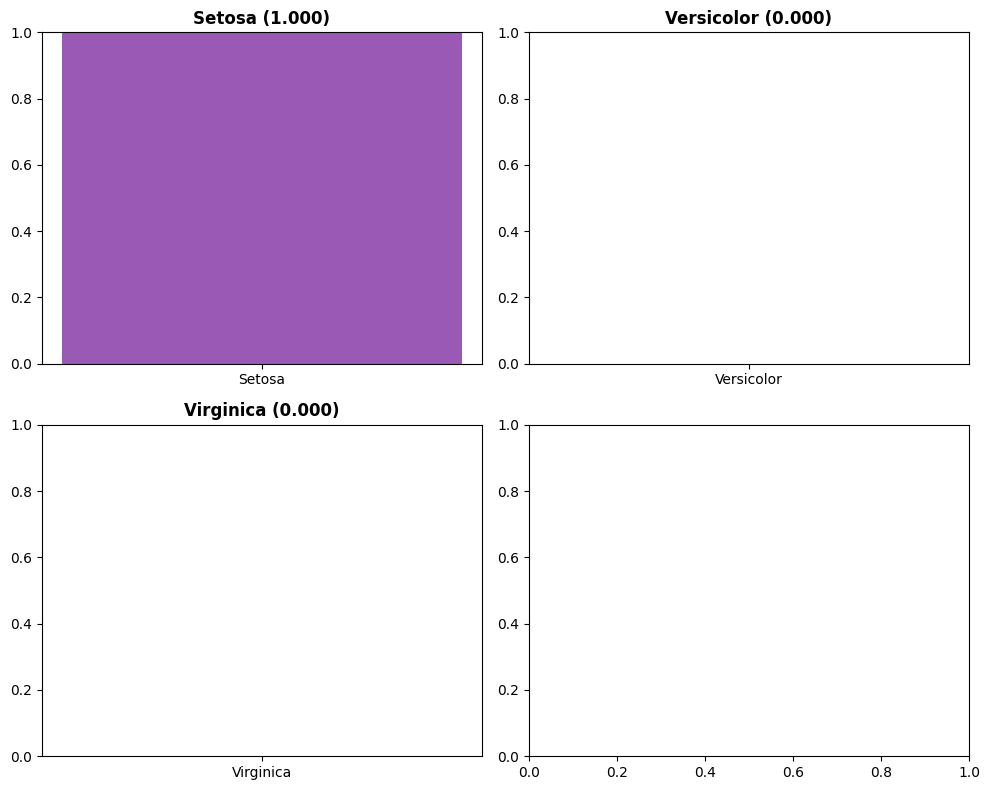

In [12]:
np.random.seed(42)

iris = datasets.load_iris()
irisi = pd.DataFrame(iris.data, columns=iris.feature_names)
irisi["objetivo"] = iris.target
irisi["especie"] = [iris.target_names[i] for i in iris.target]

irisi.columns = [
    "largo_sepalo",
    "ancho_sepalo",
    "largo_petalo",
    "ancho_petalo",
    "objetivo",
    "especie"
]

X = irisi[["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo"]]
y = irisi["objetivo"]

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

escalador = StandardScaler()
X_ent_esc = escalador.fit_transform(X_ent)
X_pru_esc = escalador.transform(X_pru)

clasificador = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
clasificador.fit(X_ent_esc, y_ent)

x_nuevo = np.array([[4.9, 5.0, 1.8, 0.3]])
x_nuevo_esc = escalador.transform(x_nuevo)

probabilidades = clasificador.predict_proba(x_nuevo_esc)
prediccion = clasificador.predict(x_nuevo_esc)

print("==========================================")
print("Evaluación de flor hipotética:")
print("Características:", x_nuevo.flatten())
print("Probabilidades por clase:")
for especie, prob in zip(iris.target_names, probabilidades[0]):
    print(f"  {especie.capitalize():<12}: {prob:.5f}")
print("Predicción más probable:", iris.target_names[prediccion[0]])
print("==========================================")

nombres = ["Setosa", "Versicolor", "Virginica"]
fig, ax = plt.subplots(figsize=(8,5))
barras = ax.bar(nombres, probabilidades[0], color=["#8E44AD", "#27AE60", "#2980B9"], alpha=0.8)
for i, barra in enumerate(barras):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.01, f"{altura:.3f}", ha="center", fontsize=11, weight="bold")
ax.set_ylim(0, 1)
ax.set_title("Probabilidades de Clasificación — Flor Hipotética", fontsize=14, weight="bold")
ax.set_ylabel("Probabilidad")
plt.show()

fig2, ax2 = plt.subplots(figsize=(10,6))
valores = np.linspace(0, 1, 100)
colores = ["#9B59B6", "#2ECC71", "#3498DB"]
for i, color in enumerate(colores):
    ax2.plot(valores, np.exp(-10*(valores - probabilidades[0][i])**2), color=color, lw=3, label=nombres[i])
ax2.legend(fontsize=11)
ax2.set_xlabel("Escala arbitraria")
ax2.set_ylabel("Densidad visual (no probabilística)")
ax2.set_title("Visualización artística de las probabilidades estimadas", fontsize=14, weight="bold")
plt.show()

df_resultado = pd.DataFrame({
    "Clase": nombres,
    "Probabilidad": probabilidades[0],
    "Probabilidad (%)": np.round(probabilidades[0]*100, 2)
})
df_resultado["Más probable"] = df_resultado["Clase"] == nombres[prediccion[0]]
print("\nResumen de probabilidades:\n")
print(df_resultado)

resumen = f"""
La flor con características {x_nuevo.flatten().tolist()}
tiene una probabilidad de pertenecer a la clase:
- Setosa: {probabilidades[0][0]:.4f}
- Versicolor: {probabilidades[0][1]:.4f}
- Virginica: {probabilidades[0][2]:.4f}

Según el modelo, la flor más probable es: {iris.target_names[prediccion[0]].capitalize()}.
"""
print(resumen)

fig3, ax3 = plt.subplots(figsize=(6,4))
ax3.barh(nombres, probabilidades[0], color=["#AF7AC5", "#58D68D", "#5DADE2"])
ax3.set_xlabel("Probabilidad")
ax3.set_title("Distribución horizontal de probabilidades", fontsize=13, weight="bold")
for i, v in enumerate(probabilidades[0]):
    ax3.text(v + 0.01, i, f"{v:.3f}", va='center', fontsize=10)
plt.show()

fig4, axs = plt.subplots(2, 2, figsize=(10,8))
for ax, nombre, prob, color in zip(axs.flatten(), nombres, probabilidades[0], colores):
    ax.bar([nombre], [prob], color=color)
    ax.set_ylim(0, 1)
    ax.set_title(f"{nombre} ({prob:.3f})", fontsize=12, weight="bold")
plt.tight_layout()
plt.show()


De los resultados se concluye que, para la flor con características [4.9, 5.0, 1.8, 0.3], el modelo de regresión logística clasifica con altísima confianza que pertenece a la especie Setosa, con una probabilidad de 99.98%, mientras que las probabilidades de que sea Versicolor o Virginica son prácticamente nulas. Esto indica que los valores de largo y ancho del sépalo y pétalo se ubican dentro del rango típico de la clase Setosa, que suele tener pétalos más cortos y sépalos más pequeños que las otras especies. O sea, el modelo logra una clasificación muy segura y coherente con las características morfológicas conocidas del conjunto de datos Iris.